In [1]:
import os
import datetime

from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot



Output hidden; open in https://colab.research.google.com to view.

In [2]:
data="/content/drive/MyDrive/P2M/Data/temperature.csv"
df = pd.read_csv(data)
df.head()

,44957564,542,168,67,29,0,0.1,2021-08-10 00:00:04,2021-08-10 00:00:04.1,\N,...,\N.2,\N.3,36,\N.4,0.2,6052780,0.3,\N.5,\N.6,Clim iot 04
0,44957568,542,168,67,30,0,0,2021-08-10 00:00:12,2021-08-10 00:00:12,\N,...,\N,\N,36,\N,0,6052782,0,\N,\N,Clim iot 04
1,44957572,542,168,67,29,0,0,2021-08-10 00:00:21,2021-08-10 00:00:21,\N,...,\N,\N,36,\N,0,6052783,0,\N,\N,Clim iot 04
2,44957580,542,168,67,29,0,0,2021-08-10 00:00:31,2021-08-10 00:00:31,\N,...,\N,\N,36,\N,0,6052786,0,\N,\N,Clim iot 04
3,44957581,542,168,67,29,0,0,2021-08-10 00:00:35,2021-08-10 00:00:35,\N,...,\N,\N,36,\N,0,6052787,0,\N,\N,Clim iot 04
4,44957588,542,168,67,29,0,0,2021-08-10 00:00:42,2021-08-10 00:00:42,\N,...,\N,\N,36,\N,0,6052790,0,\N,\N,Clim iot 04


In [3]:
df["Clim iot 04"].nunique()

1

In [4]:
data="/content/drive/MyDrive/P2M/Data/Data.csv"
df = pd.read_csv(data)
df.head()

,Mvt,Temp,Date,Time,TempExt
0,0.0,29.0,2021-08-10,00:00:04,36
1,1.0,30.0,2021-08-10,00:00:08,36
2,0.0,30.0,2021-08-10,00:00:12,36
3,1.0,29.0,2021-08-10,00:00:14,36
4,0.0,29.0,2021-08-10,00:00:21,36


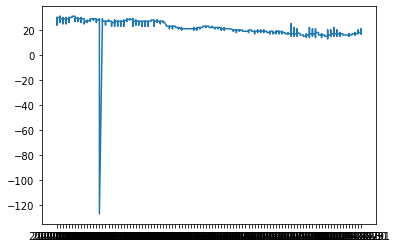

In [5]:
plt.plot(df['Date'],df['Temp'])
plt.show()

In [6]:
df1=df.copy()
df1.head()

,Mvt,Temp,Date,Time,TempExt
0,0.0,29.0,2021-08-10,00:00:04,36
1,1.0,30.0,2021-08-10,00:00:08,36
2,0.0,30.0,2021-08-10,00:00:12,36
3,1.0,29.0,2021-08-10,00:00:14,36
4,0.0,29.0,2021-08-10,00:00:21,36


In [7]:
indexNames = df1[ df1['Temp'] <0 ].index
indexNames

Int64Index([505994], dtype='int64')

In [8]:
df1.drop(indexNames , inplace=True)

In [9]:
df1.describe()

,Mvt,Temp,TempExt
count,3.722749e+06,3.722749e+06,3.722749e+06
mean,6.526392e-01,2.200489e+01,1.932440e+01
std,4.761316e-01,4.323730e+00,7.290517e+00
min,0.000000e+00,1.300000e+01,0.000000e+00
25%,0.000000e+00,1.800000e+01,1.400000e+01
50%,1.000000e+00,2.100000e+01,1.900000e+01
75%,1.000000e+00,2.700000e+01,2.500000e+01
max,1.000000e+00,3.100000e+01,4.800000e+01


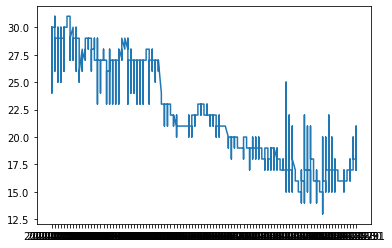

In [10]:
plt.plot(df1['Date'],df1['Temp'])
plt.show()

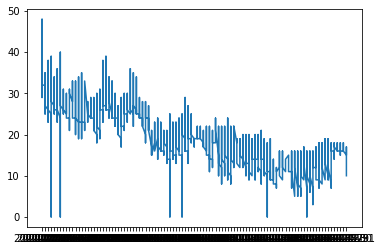

In [11]:
plt.plot(df1['Date'],df1['TempExt'])
plt.show()

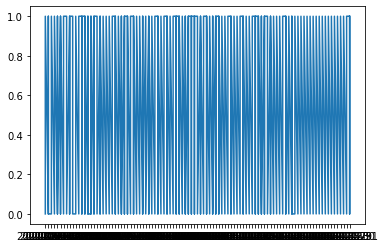

In [12]:
plt.plot(df1['Date'],df1['Mvt'])
plt.show()

# **2.Train Model**

In [13]:
pd.to_datetime(df1['Date'] + ' ' + df1['Time'])

0         2021-08-10 00:00:04
1         2021-08-10 00:00:08
2         2021-08-10 00:00:12
3         2021-08-10 00:00:14
4         2021-08-10 00:00:21
                  ...        
3722745   2021-12-31 23:59:53
3722746   2021-12-31 23:59:54
3722747   2021-12-31 23:59:56
3722748   2021-12-31 23:59:58
3722749   2021-12-31 23:59:59
Length: 3722749, dtype: datetime64[ns]

In [14]:
df1['DateTime']=pd.to_datetime(df1['Date'] + ' ' + df1['Time'])

In [15]:
df1['date'] = pd.to_datetime(df1['DateTime'], format='%d-%m-%Y %H:%M')
df1['hour'] = df1['date'].apply(lambda x : x.hour)
df1['year'] = df1['date'].apply(lambda x : x.year)
df1['month'] = df1['date'].apply(lambda x : x.month)
df1['day'] = df1['date'].apply(lambda x : x.day)
df1.head()

,Mvt,Temp,Date,Time,TempExt,DateTime,date,hour,year,month,day
0,0.0,29.0,2021-08-10,00:00:04,36,2021-08-10 00:00:04,2021-08-10 00:00:04,0,2021,8,10
1,1.0,30.0,2021-08-10,00:00:08,36,2021-08-10 00:00:08,2021-08-10 00:00:08,0,2021,8,10
2,0.0,30.0,2021-08-10,00:00:12,36,2021-08-10 00:00:12,2021-08-10 00:00:12,0,2021,8,10
3,1.0,29.0,2021-08-10,00:00:14,36,2021-08-10 00:00:14,2021-08-10 00:00:14,0,2021,8,10
4,0.0,29.0,2021-08-10,00:00:21,36,2021-08-10 00:00:21,2021-08-10 00:00:21,0,2021,8,10


In [16]:
df1 = df1.drop(columns="Mvt")
df1.head()

,Temp,Date,Time,TempExt,DateTime,date,hour,year,month,day
0,29.0,2021-08-10,00:00:04,36,2021-08-10 00:00:04,2021-08-10 00:00:04,0,2021,8,10
1,30.0,2021-08-10,00:00:08,36,2021-08-10 00:00:08,2021-08-10 00:00:08,0,2021,8,10
2,30.0,2021-08-10,00:00:12,36,2021-08-10 00:00:12,2021-08-10 00:00:12,0,2021,8,10
3,29.0,2021-08-10,00:00:14,36,2021-08-10 00:00:14,2021-08-10 00:00:14,0,2021,8,10
4,29.0,2021-08-10,00:00:21,36,2021-08-10 00:00:21,2021-08-10 00:00:21,0,2021,8,10


In [17]:
df1 = df1.drop(columns="Date")
df1 = df1.drop(columns="Time")

In [18]:
df1 = df1.drop(columns="date")

In [19]:
df1.head()

,Temp,TempExt,DateTime,hour,year,month,day
0,29.0,36,2021-08-10 00:00:04,0,2021,8,10
1,30.0,36,2021-08-10 00:00:08,0,2021,8,10
2,30.0,36,2021-08-10 00:00:12,0,2021,8,10
3,29.0,36,2021-08-10 00:00:14,0,2021,8,10
4,29.0,36,2021-08-10 00:00:21,0,2021,8,10


In [20]:
df_without_duplicates = df1.drop_duplicates(
    subset=['hour','day','month'], keep="last")

In [21]:
df_without_duplicates.head()

,Temp,TempExt,DateTime,hour,year,month,day
1544,30.0,36,2021-08-10 00:59:59,0,2021,8,10
3345,30.0,35,2021-08-10 01:59:57,1,2021,8,10
4857,30.0,33,2021-08-10 02:59:59,2,2021,8,10
6395,30.0,31,2021-08-10 03:59:58,3,2021,8,10
8193,30.0,32,2021-08-10 04:59:58,4,2021,8,10


In [22]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from scipy.stats import normaltest
df_without_duplicates_mm = minmax_scale(df_without_duplicates["Temp"])
scaler = StandardScaler()
numpy_array = df_without_duplicates["Temp"].to_numpy()
numpy_array = numpy_array.reshape(-1,1)
df_without_duplicates_ss = scaler.fit_transform(numpy_array)
print(df_without_duplicates_mm,'\n****************\n',df_without_duplicates_ss)

[0.94117647 0.94117647 0.94117647 ... 0.23529412 0.17647059 0.17647059] 
****************
 [[ 1.7840633 ]
 [ 1.7840633 ]
 [ 1.7840633 ]
 ...
 [-0.95726355]
 [-1.18570745]
 [-1.18570745]]


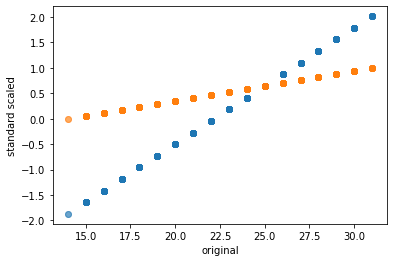

In [23]:
plt.scatter(df_without_duplicates["Temp"], df_without_duplicates_ss, alpha=0.3)
plt.scatter(df_without_duplicates["Temp"], df_without_duplicates_mm, alpha=0.3)

plt.ylabel("standard scaled")
plt.xlabel("original");

Text(0, 0.5, 'temperture')

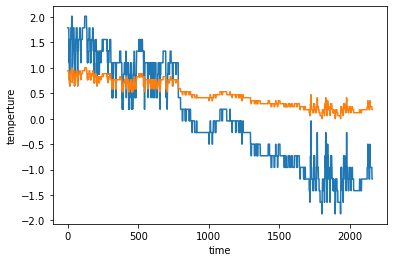

In [24]:
plt.plot(df_without_duplicates_ss)
plt.plot(df_without_duplicates_mm)
plt.xlabel('time')
plt.ylabel('temperture')

In [25]:
!pip install statsmodels==0.12.1

     |████████████████████████████████| 9.5 MB 4.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


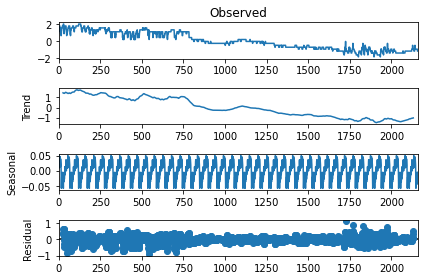

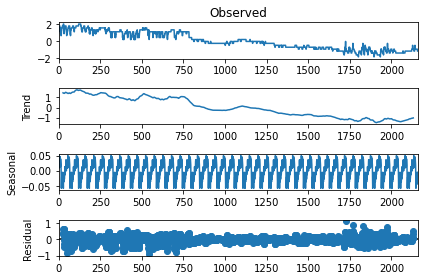

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_without_duplicates_ss, model='additive', period=52)
result.plot()

In [27]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
h=sm.tsa.arima.ARIMA(endog=df_without_duplicates_ss,order=(1,1,3))
model=h.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2159
Model:                 ARIMA(1, 1, 3)   Log Likelihood                1295.332
Date:                Wed, 30 Mar 2022   AIC                          -2580.663
Time:                        20:14:48   BIC                          -2552.279
Sample:                             0   HQIC                         -2570.281
                               - 2159                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8341      0.021     39.678      0.000       0.793       0.875
ma.L1         -0.9462      0.024    -38.708      0.000      -0.994      -0.898
ma.L2         -0.0356      0.018     -1.930      0.054      -0.072       0.001
ma.L3          0.0183      0.019      0.957      0.339      -0.019       0.056
sigma2         0.0176      0.000     70.196      0.000       0.017       0.018
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              5258.27
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                            -0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

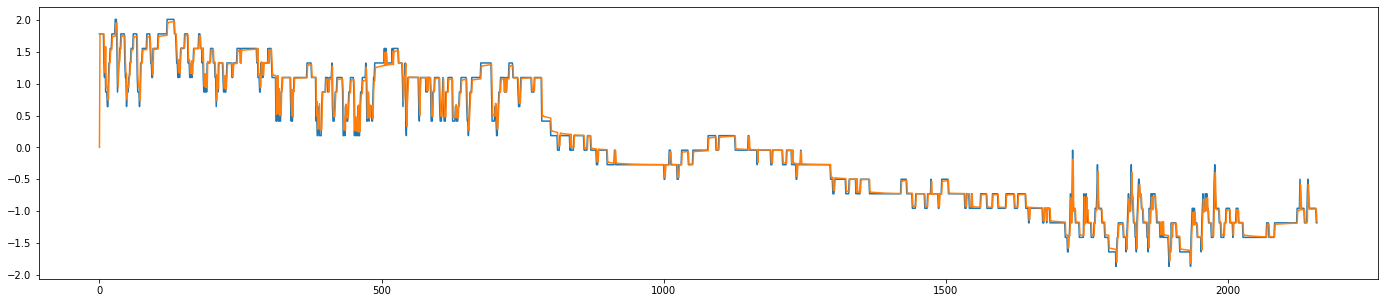

In [28]:
plt.figure(figsize=(24,5))
plt.plot(df_without_duplicates_ss)
plt.plot(model.predict())
plt.show()

In [34]:
temerature_predicted = model.predict()
from sklearn import metrics  
r2 = metrics.r2_score(df_without_duplicates_ss, temerature_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
R2 score is 0.9808999325457943


The R2 score is 0.98 and it shows that our model fit data well because r2 is close to 1